In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


In [3]:
train = pd.read_csv(r"/Users/sharvitkashikar/greenAI-Sem7/day-10/RNN/DailyDelhiClimateTest/DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')
test = pd.read_csv(r"/Users/sharvitkashikar/greenAI-Sem7/day-10/RNN/DailyDelhiClimateTest/DailyDelhiClimateTest.csv")

In [4]:
train.head()


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [6]:
#perform head tail describe and preprocessing steps on this dataset
train.tail()



,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [7]:
train.describe()


,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [8]:
train.isnull().sum()


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [9]:
# The 'date' column is already set as the index and is in datetime format for 'train'.
# No further action is needed here.

In [10]:
train['day'] = train.index.day
train['month'] = train.index.month
train['year'] = train.index.year
# Note: date is already set as index from earlier data loading


In [11]:
# Converting date to datetime format
test['date'] = pd.to_datetime(test['date'])
# Set date as index
test.set_index('date', inplace=True)
# Extract day and month features
test['day'] = test.index.day
test['month'] = test.index.month
test['year'] = test.index.year

In [12]:
#display train and test data
train.head()
test.head()

,meantemp,humidity,wind_speed,meanpressure,day,month,year
date,,,,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000,1,1,2017
2017-01-02,18.500000,77.222222,2.894444,1018.277778,2,1,2017
2017-01-03,17.111111,81.888889,4.016667,1018.333333,3,1,2017
2017-01-04,18.700000,70.050000,4.545000,1015.700000,4,1,2017
2017-01-05,18.388889,74.944444,3.300000,1014.333333,5,1,2017


In [13]:
# Concatenate the train and test data
data = pd.concat([train, test], axis=0)
# Since date is already the index, we don't need to drop it again
data.head()


,meantemp,humidity,wind_speed,meanpressure,day,month,year
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,2,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,3,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,4,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,5,1,2013


In [14]:
import plotly.graph_objects as go


In [15]:
fig_temp = go.Figure()
fig_temp.add_trace(go.Scatter(x = data.index, y = data['meantemp'], mode='lines', name='Mean Temperature'))
fig_temp.update_layout(
    title='Mean Temperature Over Time',
    xaxis_title='Date',
    yaxis_title='Mean Temperature (°C)',
)

In [16]:
#display mode = 9
fig_temp.show()

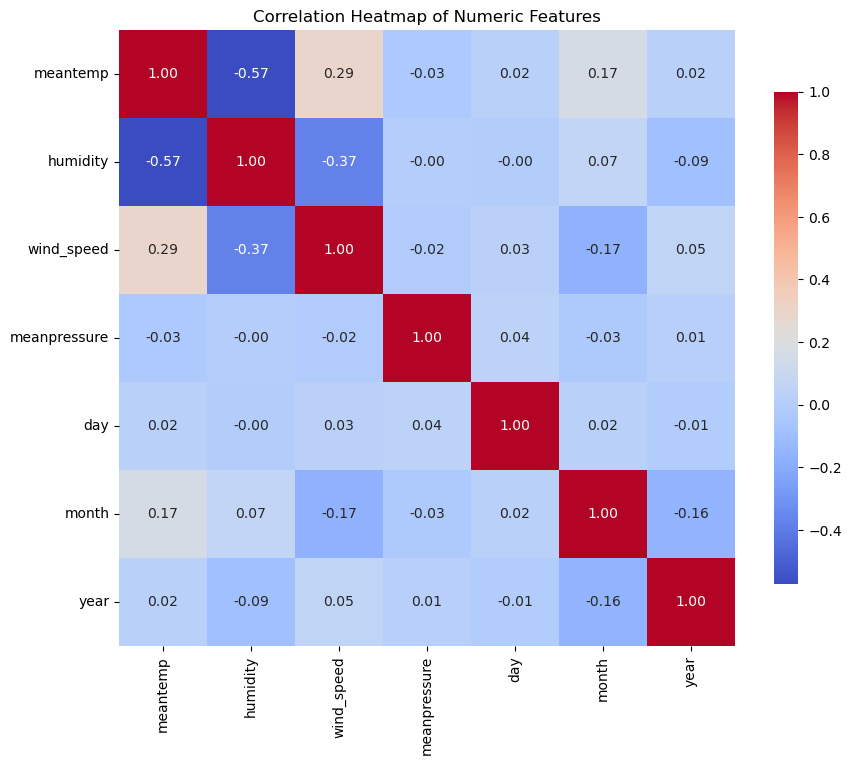

In [17]:
numeric_df = data.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
# Set the figure size
plt.figure(figsize=(10, 8))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [18]:
numeric_df = numeric_df.drop(columns=['day', 'month', 'year'], axis=1, errors='ignore')

corr = numeric_df.corr()

<Axes: >

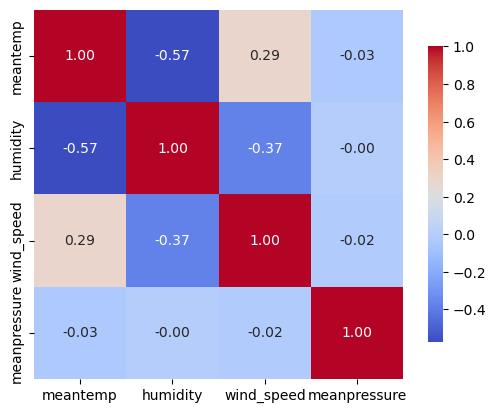

In [19]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})


In [20]:
#ned to analyze the heatmap and tell us which features are highly important to determine the temperature of the next 30 days
important_features = corr['meantemp'].abs().sort_values(ascending=False).head(3)
print("Top 10 features highly correlated with 'meantemp':")
print(important_features)


Top 10 features highly correlated with 'meantemp':
meantemp      1.000000
humidity      0.574849
wind_speed    0.288088
Name: meantemp, dtype: float64


In [21]:
#create a dataframe named climate_df
climate_df = data[['meantemp', 'humidity', 'wind_speed', 'month', 'meanpressure', 'day', 'year']].copy()
climate_df.head()

,meantemp,humidity,wind_speed,month,meanpressure,day,year
date,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1,1017.800000,2,2013
2013-01-03,7.166667,87.000000,4.633333,1,1018.666667,3,2013
2013-01-04,8.666667,71.333333,1.233333,1,1017.166667,4,2013
2013-01-05,6.000000,86.833333,3.700000,1,1016.500000,5,2013


In [22]:
import plotly.express as px
figure = px.scatter(climate_df, x='meantemp', y='humidity', size='meantemp', trendline='ols', title='Humidity vs Mean Temperature')
figure

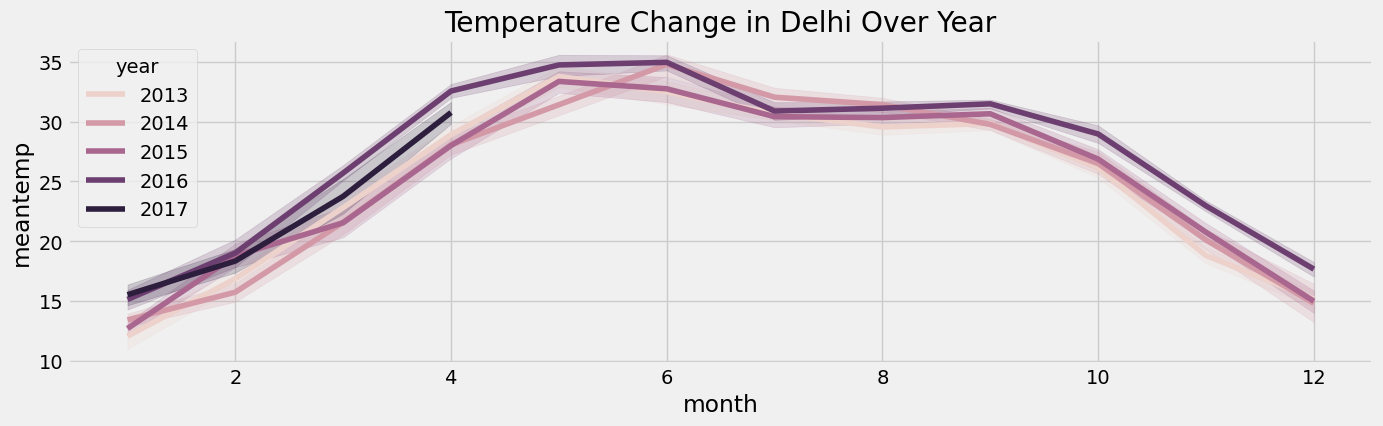

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 4))
plt.title("Temperature Change in Delhi Over Year")
sns.lineplot(climate_df, x = 'month', y = 'meantemp', hue='year')
plt.show()

In [24]:
new_df = climate_df.drop(columns=['year', 'month', 'day'], axis=1)

In [25]:
new_df.sample()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2014-12-09,15.285714,67.571429,0.0,1016.857143


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(new_df, test_size=0.2, random_state=42)
#now scale the X_train and X_test
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)







In [27]:
length = 12
stride = 1
data2 =[]
target =[]
for i in range(0, len(X_train_scaled) - length+1, stride):
    data2.append(X_train_scaled[i:i+length])
    target.append(X_train_scaled[i+length-1])
data2, target = np.array(data2), np.array(target)
print(data2.shape, target.shape)


(1249, 12, 4) (1249, 4)


In [28]:
n_features = data2.shape[2]
n_features

4

In [29]:
model = Sequential()
model.add(SimpleRNN(units = 128, activation='tanh', input_shape=(length, n_features)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()


2025-06-18 12:12:32.995545: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-06-18 12:12:32.995677: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-06-18 12:12:32.995681: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-06-18 12:12:32.996425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-18 12:12:32.996973: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,393 (107.00 KB)

 Trainable params: 27,393 (107.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


2025-06-18 12:12:34.049304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.2270 - val_loss: 0.0671
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.1032 - val_loss: 0.0692
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0854 - val_loss: 0.0639
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0824 - val_loss: 0.0635
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0776 - val_loss: 0.0639
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0747 - val_loss: 0.0634
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0728 - val_loss: 0.0634
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0715 - val_loss: 0.0634
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0695 - val_loss: 0.0635
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0697 - val_loss: 0.0635
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0718 - val_loss: 0.0635
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0701 - val_

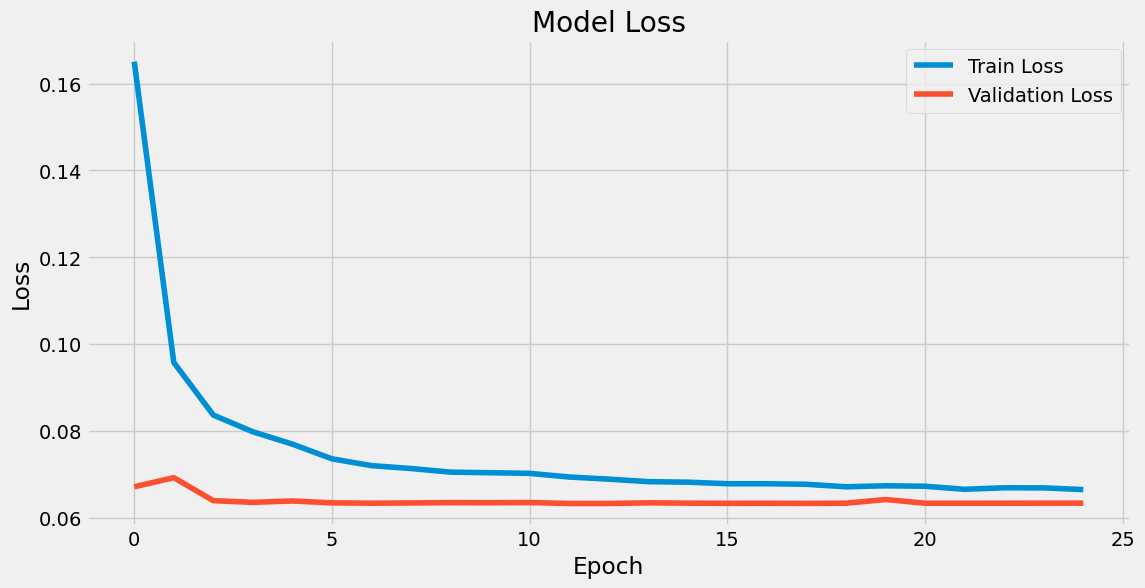

In [30]:
history = model.fit(data2, target, epochs=25, batch_size=32, validation_split=0.2)
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [32]:
#LSTM model
from tensorflow.keras.layers import LSTM, Dropout
model_lstm = Sequential()
model_lstm.add(LSTM(units=128, activation='tanh', input_shape=(length, n_features), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=64, activation='tanh', return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=32, activation='tanh'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
history_lstm = model_lstm.fit(data2, target, epochs=25, batch_size=32, validation_split=0.2)


Epoch 1/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0919 - val_loss: 0.0672
Epoch 2/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0694 - val_loss: 0.0668
Epoch 3/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0689 - val_loss: 0.0669
Epoch 4/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0708 - val_loss: 0.0667
Epoch 5/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0694 - val_loss: 0.0668
Epoch 6/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0686 - val_loss: 0.0669
Epoch 7/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0690 - val_loss: 0.0669
Epoch 8/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0678 - val_loss: 0.0667
Epoch 9/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0701 - val_loss: 0.0667
Epoch 10/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0692 - val_loss: 0.0668
Epoch 11/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0686 - val_loss: 0.0667
Epoch 12/25
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

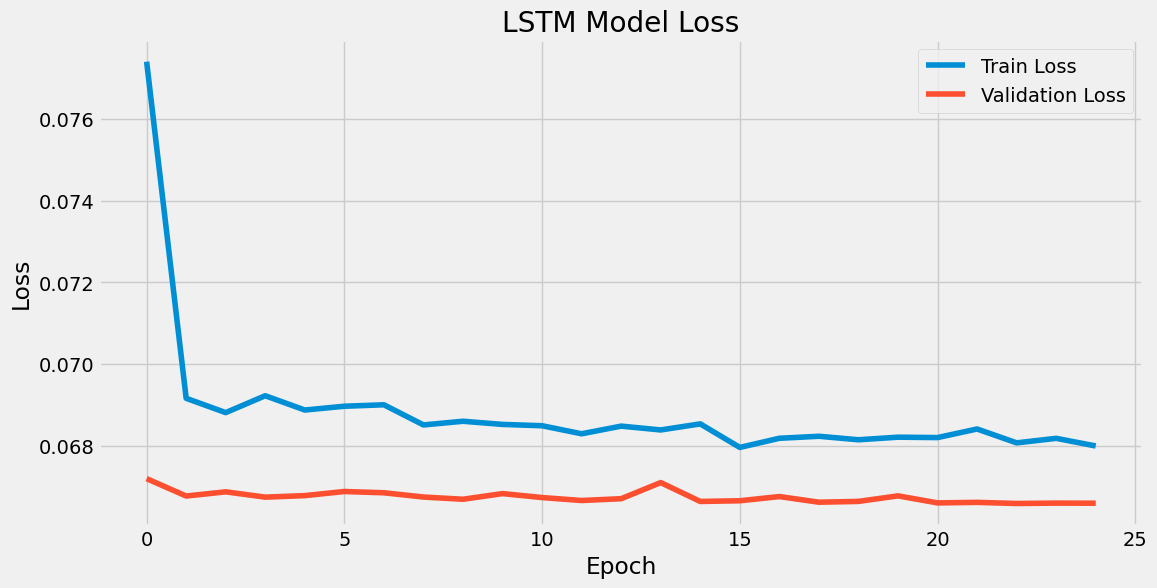

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()